# Import libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split

# Reading dataset

In [208]:
monkeypox_dataset = pd.read_csv('/content/Monkeypox Coursework Dataset.csv')

# Task (1) – Domain Understanding: Classification

In [209]:
monkeypox_dataset.head(10)

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,None,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,AA0022,Fever,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,AA0023,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,AA0024,None,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,AA0025,Swollen Lymph Nodes,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive
5,AA0026,Swollen Lymph Nodes,3.0,0.0,1,0.0,0,0,0.0,0.0,5707560,7830,0,30,9,0,0.0,Negative
6,AA0027,Fever,1.0,0.0,1,0.0,0,0,0.0,1.0,4659279,6888,0,40,7,0,0.0,Positive
7,AA0028,Fever,1.0,1.0,1,0.0,1,1,1.0,0.0,5430587,9905,0,23,5,1,0.0,Positive
8,AA0029,Muscle Aches and Pain,2.0,0.0,1,1.0,1,0,0.0,0.0,4197439,8707,1,41,10,0,0.0,Positive
9,AA0030,Fever,1.0,0.0,0,1.0,1,1,0.0,1.0,5342237,4703,0,30,1,0,0.0,Negative


In [210]:
monkeypox_dataset.tail(10)

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
24990,AH33687,Muscle Aches and Pain,2.0,0.0,0,1.0,1,0,0.0,1.0,4845506,6084,1,33,9,1,0.0,Negative
24991,AH33688,Fever,1.0,0.0,1,0.0,0,1,0.0,1.0,5138633,5035,1,37,6,0,1.0,Positive
24992,AH33689,None,0.0,1.0,0,1.0,0,0,0.0,0.0,4488543,7251,0,42,12,1,1.0,Negative
24993,AH33690,None,0.0,1.0,1,1.0,0,0,0.0,0.0,4533912,8314,0,33,2,1,1.0,Positive
24994,AH33691,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,5747771,9365,1,39,7,0,1.0,Positive
24995,AH33692,None,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,AH33693,Fever,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,AH33694,None,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,AH33695,Swollen Lymph Nodes,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative
24999,AH33696,Swollen Lymph Nodes,3.0,0.0,0,1.0,0,0,1.0,1.0,5398533,7850,0,47,7,0,0.0,Positive


In [211]:
monkeypox_dataset.columns

Index(['Test ID', 'Systemic Illness', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count', 'Home ownership',
       'Age', 'Month of Birth', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'],
      dtype='object')

In [212]:
monkeypox_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Test ID                         25000 non-null  object 
 1   Systemic Illness                24998 non-null  object 
 2   Encoded Systemic Illness        24998 non-null  float64
 3   Rectal Pain                     24997 non-null  float64
 4   Sore Throat                     25000 non-null  int64  
 5   Penile Oedema                   24994 non-null  float64
 6   Oral Lesions                    24996 non-null  object 
 7   Solitary Lesion                 25000 non-null  int64  
 8   Swollen Tonsils                 24993 non-null  float64
 9   HIV Infection                   24995 non-null  float64
 10  Red blood cells count           25000 non-null  int64  
 11  White blood cells count         25000 non-null  int64  
 12  Home ownership                  

In [213]:
df = monkeypox_dataset.copy()

# Removing multiple columns
columns_to_drop = ['Test ID', 'Systemic Illness']
df = df.drop(columns_to_drop, axis=1)

In [214]:
df.head()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24998 non-null  float64
 1   Rectal Pain                     24997 non-null  float64
 2   Sore Throat                     25000 non-null  int64  
 3   Penile Oedema                   24994 non-null  float64
 4   Oral Lesions                    24996 non-null  object 
 5   Solitary Lesion                 25000 non-null  int64  
 6   Swollen Tonsils                 24993 non-null  float64
 7   HIV Infection                   24995 non-null  float64
 8   Red blood cells count           25000 non-null  int64  
 9   White blood cells count         25000 non-null  int64  
 10  Home ownership                  25000 non-null  int64  
 11  Age                             24964 non-null  object 
 12  Month of Birth                  

In [216]:
print(df.columns.tolist())

['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Red blood cells count', 'White blood cells count', 'Home ownership', 'Age', 'Month of Birth', 'Health Insurance', 'Sexually Transmitted Infection', 'MPOX PCR Result']


In [217]:
print(monkeypox_dataset.columns.tolist())

['Test ID', 'Systemic Illness', 'Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Red blood cells count', 'White blood cells count', 'Home ownership', 'Age', 'Month of Birth', 'Health Insurance', 'Sexually Transmitted Infection', 'MPOX PCR Result']


In [218]:
monkeypox_dataset.describe()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Month of Birth,Health Insurance,Sexually Transmitted Infection
count,24998.000000,24997.000000,25000.000000,24994.000000,25000.000000,24993.000000,24995.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,24996.000000
mean,1.497640,0.493819,0.502160,0.504441,0.501080,0.501260,0.503301,5.004591e+06,7749.114440,0.495600,6.517040,0.498480,0.497880
std,1.116872,0.499972,0.500005,0.499990,0.500009,0.500008,0.499999,5.204760e+05,1885.213591,0.499991,3.441038,0.500008,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100135e+06,4500.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.555418e+06,6116.000000,0.000000,4.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.002304e+06,7747.000000,0.000000,7.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.458530e+06,9379.000000,1.000000,10.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.899806e+06,11000.000000,1.000000,12.000000,1.000000,1.000000


In [219]:
df.describe()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Month of Birth,Health Insurance,Sexually Transmitted Infection
count,24998.000000,24997.000000,25000.000000,24994.000000,25000.000000,24993.000000,24995.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,24996.000000
mean,1.497640,0.493819,0.502160,0.504441,0.501080,0.501260,0.503301,5.004591e+06,7749.114440,0.495600,6.517040,0.498480,0.497880
std,1.116872,0.499972,0.500005,0.499990,0.500009,0.500008,0.499999,5.204760e+05,1885.213591,0.499991,3.441038,0.500008,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100135e+06,4500.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.555418e+06,6116.000000,0.000000,4.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.002304e+06,7747.000000,0.000000,7.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.458530e+06,9379.000000,1.000000,10.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.899806e+06,11000.000000,1.000000,12.000000,1.000000,1.000000


# Plot distribution of class variable

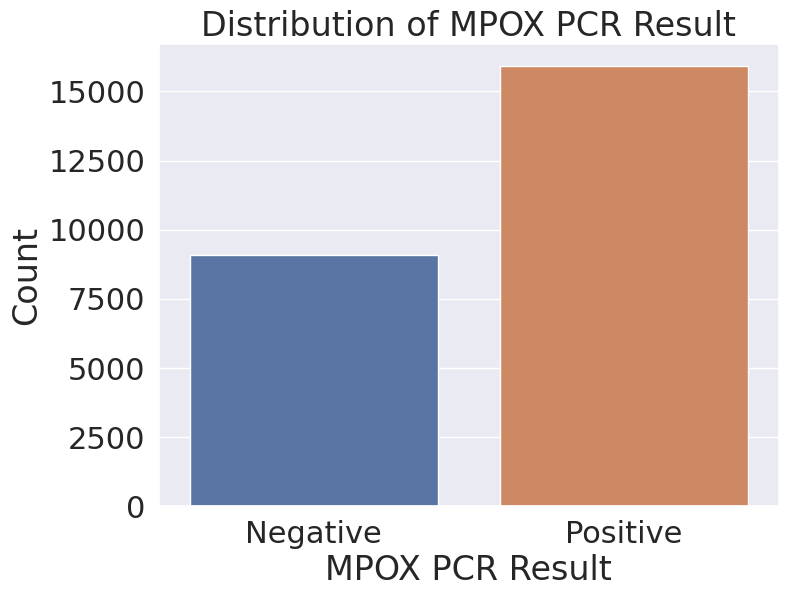

In [220]:
# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='MPOX PCR Result', data=df)
plt.title('Distribution of MPOX PCR Result')
plt.xlabel('MPOX PCR Result')
plt.ylabel('Count')
plt.show()

# Dealing with empty fields

In [221]:
df.isnull().sum()

Encoded Systemic Illness           2
Rectal Pain                        3
Sore Throat                        0
Penile Oedema                      6
Oral Lesions                       4
Solitary Lesion                    0
Swollen Tonsils                    7
HIV Infection                      5
Red blood cells count              0
White blood cells count            0
Home ownership                     0
Age                               36
Month of Birth                     0
Health Insurance                   0
Sexually Transmitted Infection     4
MPOX PCR Result                    0
dtype: int64

In [222]:
df.isna().sum()/len(monkeypox_dataset)*100

Encoded Systemic Illness          0.008
Rectal Pain                       0.012
Sore Throat                       0.000
Penile Oedema                     0.024
Oral Lesions                      0.016
Solitary Lesion                   0.000
Swollen Tonsils                   0.028
HIV Infection                     0.020
Red blood cells count             0.000
White blood cells count           0.000
Home ownership                    0.000
Age                               0.144
Month of Birth                    0.000
Health Insurance                  0.000
Sexually Transmitted Infection    0.016
MPOX PCR Result                   0.000
dtype: float64

In [223]:
def missing_values_table(df):

        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing values', 1 : '% What is the percentage of the full column'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% What is the percentage of the full column', ascending=False).round(2)


        return mis_val_table_ren_columns

In [224]:
missing_values_table(df)

,Missing values,% What is the percentage of the full column
Age,36,0.14
Swollen Tonsils,7,0.03
Penile Oedema,6,0.02
HIV Infection,5,0.02
Oral Lesions,4,0.02
Sexually Transmitted Infection,4,0.02
Rectal Pain,3,0.01
Encoded Systemic Illness,2,0.01


In [226]:
df = df.replace({None: np.nan})

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24998 non-null  float64
 1   Rectal Pain                     24997 non-null  float64
 2   Sore Throat                     25000 non-null  int64  
 3   Penile Oedema                   24994 non-null  float64
 4   Oral Lesions                    24996 non-null  object 
 5   Solitary Lesion                 25000 non-null  int64  
 6   Swollen Tonsils                 24993 non-null  float64
 7   HIV Infection                   24995 non-null  float64
 8   Red blood cells count           25000 non-null  int64  
 9   White blood cells count         25000 non-null  int64  
 10  Home ownership                  25000 non-null  int64  
 11  Age                             24964 non-null  object 
 12  Month of Birth                  

In [231]:
nan_rows = df[df.isnull().any(axis=1)]
# Display the rows with NaN or empty values
print("Rows with NaN or empty values:")
display(nan_rows)

Rows with NaN or empty values:


,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
27,0.0,0.0,1,NaN,0,1,1.0,1.0,4575169,7879,1,61,2,0,1.0,Positive
28,0.0,0.0,0,NaN,1,1,0.0,1.0,4366768,7425,0,61,12,0,0.0,Negative
38,1.0,1.0,1,1.0,0,0,NaN,0.0,4885900,8214,0,47,10,0,1.0,Negative
39,2.0,1.0,0,1.0,0,0,NaN,0.0,5118075,9008,0,25,2,0,0.0,Positive
40,2.0,0.0,1,1.0,1,1,NaN,0.0,4190283,5577,0,58,8,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,3.0,1.0,1,1.0,0,0,0.0,1.0,4126045,9710,1,NaN,10,0,0.0,Positive
1931,0.0,0.0,0,1.0,1,0,0.0,0.0,4375507,5176,0,NaN,9,0,0.0,Negative
1932,0.0,1.0,0,0.0,0,1,1.0,0.0,5788803,6309,1,NaN,1,1,1.0,Negative
1933,2.0,0.0,1,1.0,0,1,1.0,1.0,4880807,9213,0,NaN,11,0,1.0,Positive


In [233]:
nan_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 27 to 1934
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        64 non-null     float64
 1   Rectal Pain                     63 non-null     float64
 2   Sore Throat                     66 non-null     int64  
 3   Penile Oedema                   60 non-null     float64
 4   Oral Lesions                    62 non-null     object 
 5   Solitary Lesion                 66 non-null     int64  
 6   Swollen Tonsils                 59 non-null     float64
 7   HIV Infection                   61 non-null     float64
 8   Red blood cells count           66 non-null     int64  
 9   White blood cells count         66 non-null     int64  
 10  Home ownership                  66 non-null     int64  
 11  Age                             30 non-null     object 
 12  Month of Birth                  66 

In [269]:
data = df.copy()

In [270]:
df.tail(10)

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
24990,2.0,0.0,0,1.0,1,0,0.0,1.0,4845506,6084,1,33,9,1,0.0,Negative
24991,1.0,0.0,1,0.0,0,1,0.0,1.0,5138633,5035,1,37,6,0,1.0,Positive
24992,0.0,1.0,0,1.0,0,0,0.0,0.0,4488543,7251,0,42,12,1,1.0,Negative
24993,0.0,1.0,1,1.0,0,0,0.0,0.0,4533912,8314,0,33,2,1,1.0,Positive
24994,1.0,0.0,1,1.0,0,0,0.0,1.0,5747771,9365,1,39,7,0,1.0,Positive
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative
24999,3.0,0.0,0,1.0,0,0,1.0,1.0,5398533,7850,0,47,7,0,0.0,Positive


In [271]:
# Drop rows with NaN values
df_cleaned = data.dropna(how='any')
display(df_cleaned)

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative


In [272]:
df_cleaned.tail(10)

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
24990,2.0,0.0,0,1.0,1,0,0.0,1.0,4845506,6084,1,33,9,1,0.0,Negative
24991,1.0,0.0,1,0.0,0,1,0.0,1.0,5138633,5035,1,37,6,0,1.0,Positive
24992,0.0,1.0,0,1.0,0,0,0.0,0.0,4488543,7251,0,42,12,1,1.0,Negative
24993,0.0,1.0,1,1.0,0,0,0.0,0.0,4533912,8314,0,33,2,1,1.0,Positive
24994,1.0,0.0,1,1.0,0,0,0.0,1.0,5747771,9365,1,39,7,0,1.0,Positive
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative
24999,3.0,0.0,0,1.0,0,0,1.0,1.0,5398533,7850,0,47,7,0,0.0,Positive


In [273]:
df_cleaned.isnull().sum()

Encoded Systemic Illness          0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Red blood cells count             0
White blood cells count           0
Home ownership                    0
Age                               0
Month of Birth                    0
Health Insurance                  0
Sexually Transmitted Infection    0
MPOX PCR Result                   0
dtype: int64

In [274]:
missing_values_table(df)

,Missing values,% What is the percentage of the full column


In [275]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24934 non-null  float64
 1   Rectal Pain                     24934 non-null  float64
 2   Sore Throat                     24934 non-null  int64  
 3   Penile Oedema                   24934 non-null  float64
 4   Oral Lesions                    24934 non-null  object 
 5   Solitary Lesion                 24934 non-null  int64  
 6   Swollen Tonsils                 24934 non-null  float64
 7   HIV Infection                   24934 non-null  float64
 8   Red blood cells count           24934 non-null  int64  
 9   White blood cells count         24934 non-null  int64  
 10  Home ownership                  24934 non-null  int64  
 11  Age                             24934 non-null  object 
 12  Month of Birth                  

# Dealing with DType Objects

In [330]:
# Display only the records with 'Yes' or 'No' in the 'Oral Lesions' column
selected_records = df_cleaned.loc[df_cleaned['Oral Lesions'].isin(['YES', 'No']), 'Oral Lesions']

print("Records with 'Yes' or 'No' in the 'Oral Lesions' column:")
print(selected_records)

Records with 'Yes' or 'No' in the 'Oral Lesions' column:
332    YES
412    YES
489    YES
532    YES
591     No
597     No
630     No
655     No
707     No
732     No
760     No
Name: Oral Lesions, dtype: object


In [331]:
# Convert text values to numerical values
df_replaced = df_cleaned.copy()

# Replace 'YES' with 1 and 'No' with 0 in the 'Oral Lesions' column
df_replaced['Oral Lesions'] = df_replaced['Oral Lesions'].replace({'YES': 1, 'No': 0})

# Display only the records with 'Yes' or 'No' in the 'Oral Lesions' column
selected_records = df_replaced[df_replaced['Oral Lesions'].isin([1, 0])]

print("Records with 'Yes' or 'No' in the 'Oral Lesions' column:")
print(selected_records['Oral Lesions'])

# Print the unique values in the 'Oral Lesions' column
print("Unique values in the 'Oral Lesions' column:")
print(df_replaced['Oral Lesions'].unique())

Records with 'Yes' or 'No' in the 'Oral Lesions' column:
332    1
412    1
489    1
532    1
591    0
597    0
630    0
655    0
707    0
732    0
760    0
Name: Oral Lesions, dtype: object
Unique values in the 'Oral Lesions' column:
['1' '0' 1 0]


In [332]:
df_replaced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24934 non-null  float64
 1   Rectal Pain                     24934 non-null  float64
 2   Sore Throat                     24934 non-null  int64  
 3   Penile Oedema                   24934 non-null  float64
 4   Oral Lesions                    24934 non-null  object 
 5   Solitary Lesion                 24934 non-null  int64  
 6   Swollen Tonsils                 24934 non-null  float64
 7   HIV Infection                   24934 non-null  float64
 8   Red blood cells count           24934 non-null  int64  
 9   White blood cells count         24934 non-null  int64  
 10  Home ownership                  24934 non-null  int64  
 11  Age                             24934 non-null  object 
 12  Month of Birth                  

In [333]:
# Convert the data type of 'Oral Lesions' column to int
df_replaced['Oral Lesions'] = df_replaced['Oral Lesions'].astype(float)

# Print the info to check the data type of the 'Oral Lesions' column
print(df_replaced.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24934 non-null  float64
 1   Rectal Pain                     24934 non-null  float64
 2   Sore Throat                     24934 non-null  int64  
 3   Penile Oedema                   24934 non-null  float64
 4   Oral Lesions                    24934 non-null  float64
 5   Solitary Lesion                 24934 non-null  int64  
 6   Swollen Tonsils                 24934 non-null  float64
 7   HIV Infection                   24934 non-null  float64
 8   Red blood cells count           24934 non-null  int64  
 9   White blood cells count         24934 non-null  int64  
 10  Home ownership                  24934 non-null  int64  
 11  Age                             24934 non-null  object 
 12  Month of Birth                  

## Dealing with the problem of Data Type Age which is Object

In [334]:
# Identify and display records with non-numeric values in the 'Age' column
non_numeric_records = df_replaced[pd.to_numeric(df['Age'], errors='coerce').isna()]

print("Records with non-numeric values in the 'Age' column:")
print(non_numeric_records['Age'])

Records with non-numeric values in the 'Age' column:
323    Twenty
Name: Age, dtype: object


In [335]:
# Replace 'Twenty' with 20 in the 'Age' column
df_replaced['Age'] = df_replaced['Age'].replace({'Twenty': 20})

In [337]:
# Identify and display records with non-numeric values in the 'Age' column
non_numeric_records = df_replaced[pd.to_numeric(df['Age'], errors='coerce').isna()]

print("Records with non-numeric values in the 'Age' column:")
print(non_numeric_records['Age'])

Records with non-numeric values in the 'Age' column:
323    20
Name: Age, dtype: object


In [338]:
# Convert the data type of 'Oral Lesions' column to int
df_replaced['Age'] = df_replaced['Age'].astype(float)

df_replaced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24934 non-null  float64
 1   Rectal Pain                     24934 non-null  float64
 2   Sore Throat                     24934 non-null  int64  
 3   Penile Oedema                   24934 non-null  float64
 4   Oral Lesions                    24934 non-null  float64
 5   Solitary Lesion                 24934 non-null  int64  
 6   Swollen Tonsils                 24934 non-null  float64
 7   HIV Infection                   24934 non-null  float64
 8   Red blood cells count           24934 non-null  int64  
 9   White blood cells count         24934 non-null  int64  
 10  Home ownership                  24934 non-null  int64  
 11  Age                             24934 non-null  float64
 12  Month of Birth                  

In [339]:
print(df_replaced['Age'].unique())
#df_replaced.head()

[ 37.  24.  34.  40.  36.  30.  23.  41.  32.  46.  27.  47.  53.  31.
  25.  26.  52.  51.  56.  39.  35.  50.  33.  28.  45.  38.  57.  55.
  43.  60.  61.  42.  59.  44.  48.  49.  58.  54. 150.  29.   0.  20.
 181. -23.]


## Dealing with Column 'MPOX PCR Result' which Dtype is Object

In [340]:
print(df_replaced['MPOX PCR Result'].unique())

['Negative' 'Positive']


In [343]:
# Replace 'Twenty' with 20 in the 'Age' column
df_replaced['MPOX PCR Result'] = df_replaced['MPOX PCR Result'].replace({'Negative': 0, 'Positive' : 1})

df_replaced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24934 non-null  float64
 1   Rectal Pain                     24934 non-null  float64
 2   Sore Throat                     24934 non-null  int64  
 3   Penile Oedema                   24934 non-null  float64
 4   Oral Lesions                    24934 non-null  float64
 5   Solitary Lesion                 24934 non-null  int64  
 6   Swollen Tonsils                 24934 non-null  float64
 7   HIV Infection                   24934 non-null  float64
 8   Red blood cells count           24934 non-null  int64  
 9   White blood cells count         24934 non-null  int64  
 10  Home ownership                  24934 non-null  int64  
 11  Age                             24934 non-null  float64
 12  Month of Birth                  

In [344]:
print(df_replaced['MPOX PCR Result'].unique())

[0 1]
